## Watershed Segmentation

One of the first prevalent tree detection methods was the watershed segmentation method. This method is also used as a subroutine for various other detection methods. pyfor offers functionality for raster based watershed segmentation. This is accomplished by tying a few other packages together.

As always, pyfor allows for interactive tweaking of parameters through `matplotlib` plots.

In [7]:
import pyfor

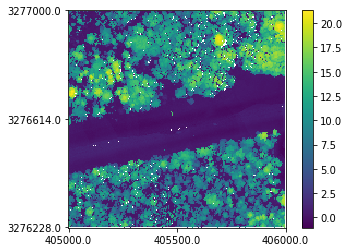

In [8]:
# Load and normalize the point cloud
pc = pyfor.cloud.Cloud("data/test.las")
pc.normalize(0.5)

# "Trim" to a study area
pc.filter(min=405000, max = 405200, dim="x")
pc.filter(min = 3276350, max = 3276350+200, dim = "y")
pc.plot()

pyfor's watershed segmentation implementation is based on two subroutines:

`skimage.feature.peak_local_max` and `skimage.morphology.watershed`

The first is used to detect local maxima, more documentation is available [here](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.peak_local_max). The second is used to conduct the watershed segmentation algorithm using the detected peaks as starting locations, its documentation can be found [here](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.watershed).

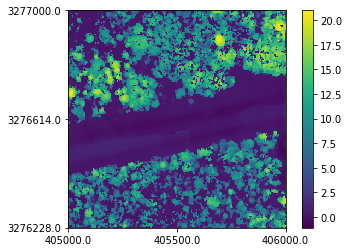

In [9]:
chm = pc.chm(0.5, interp_method = "nearest", pit_filter="median")
chm.plot()

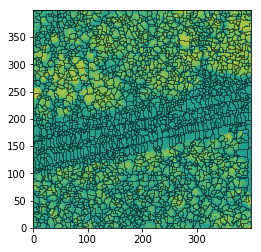

In [5]:
chm.watershed_seg(plot=True)